# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import for readability of data coming back from the API retrieval
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

######## REMEMBER TO CHANGE THE SIZE BACK TO 1500 for the full run #######################################################
# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=15)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15)
lat_lngs = zip(lats, lngs)
 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



13

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the static url information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

temperature_unit = "Imperial"

# Initialize the lists for use in holding associated data.
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Initialize an integer to count the records
record_counter = 1

print(f"Beginning Data Retrieval")

# Loop through the cities and pull the requested  weather information from the openweathermap

for city in cities:
   
    query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + temperature_unit
    response = requests.get(query_url).json()

    try:
      
      # Print out the city being worked with 
      print(f"Processing Record {record_counter} of Set 1 | {city}")  
            
      cloudiness.append(response["clouds"]["all"])
      country.append(response["sys"]["country"])
      date.append(response["dt"])
      max_temp.append(response["main"]["temp_max"])
      humidity.append(response["main"]["humidity"])
      lat.append(response["coord"]["lat"])
      lng.append(response["coord"]["lon"])
      wind_speed.append(response["wind"]["speed"])
      city_name.append(response["name"])
        
      # Increment the record counter     
      record_counter += 1
            
    except:    
      print(f"   Unable to locate City:  {city}")
      record_counter += 1
            
print(f"-----------------------------")
print(f" Data Retrieval Complete")  
print(f"-----------------------------")            

Beginning Data Retrieval
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | lephepe
   Unable to locate City:  lephepe
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | barentsburg
   Unable to locate City:  barentsburg
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | sibolga
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | yasnyy
Processing Record 13 of Set 1 | klamath falls
-----------------------------
 Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe to prepare the order the data will be written to the output file apicityweather.csv
api_city_weather_df = pd.DataFrame({"City": city_name,
                                    "Lat": lat,
                                    "Lng": lng,
                                    "Max Temp": max_temp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed": wind_speed,
                                    "Country": country,
                                    "Date": date
             })  


In [5]:
# Export the City weather data into a .csv file

api_city_weather_df.to_csv("Output/apicityweather.csv",
                  encoding="utf-8", index=False, header=True)

In [6]:
# Print the dataframe which represents the data written to the apicityweather.csv file
api_city_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hong Kong,22.2855,114.1577,68.00,82,39,5.01,HK,1615500476
1,Bluff,-46.6000,168.3333,57.99,76,3,3.00,NZ,1615500594
2,Nikolskoye,59.7035,30.7861,19.99,63,0,13.42,RU,1615500613
3,Port Alfred,-33.5906,26.8910,64.00,91,87,18.66,ZA,1615500694
4,Port Elizabeth,-33.9180,25.5701,66.20,77,20,16.11,ZA,1615500695


In [7]:
api_city_weather_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,-6.398836,47.180064,51.607273,75.545455,36.272727,10.927273,1.615501e+09
std,43.082594,90.146578,26.532586,16.537011,35.883397,8.307494,7.046598e+01
min,-53.150000,-121.781700,-15.270000,40.000000,0.000000,3.000000,1.615500e+09
25%,-40.059250,21.996650,52.700000,69.500000,1.500000,3.520000,1.615501e+09
50%,-33.590600,30.786100,57.990000,77.000000,39.000000,11.390000,1.615501e+09
75%,32.255200,106.468450,67.100000,84.500000,57.500000,14.955000,1.615501e+09
max,59.703500,168.864300,75.380000,99.000000,95.000000,28.770000,1.615501e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

#      At this time, there does not appear to be any cities having humidity > 100%
#      As per the instructions, skipping this step

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#     At this time, there does not appear to be any cities having humidity > 100%
#     As per the instructions, skipping this step


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

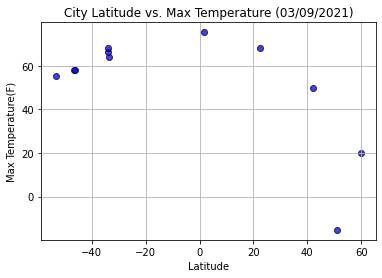

In [10]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Max Temp"], 
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Max Temperature (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.savefig("Images/LatitudeVSTemperature.png")
plt.show()



## Latitude vs. Humidity Plot

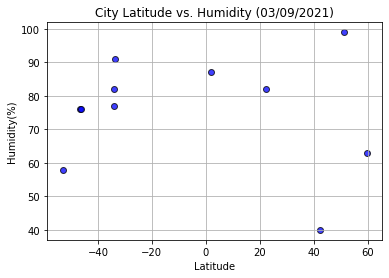

In [11]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Humidity"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Humidity (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.savefig("Images/LatitudeVSHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

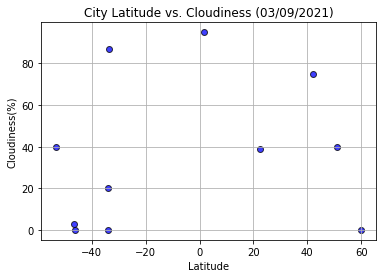

In [12]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Cloudiness"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Cloudiness (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.savefig("Images/LatitudeVSCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

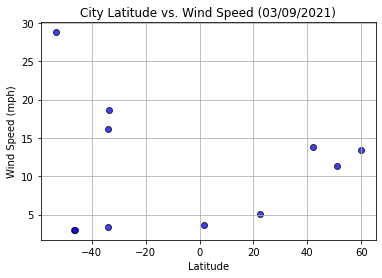

In [13]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Wind Speed"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Wind Speed (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Images/LatitudeVSWindSpeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.9182051157647344


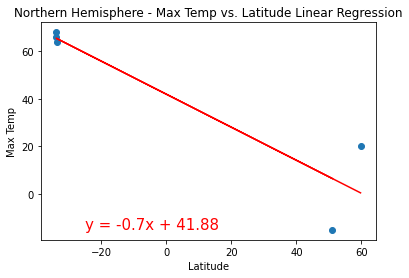

In [84]:
# Northern Hemisphere is where Longitude ranges from 0 through +90  and latitude ranges from -180 through +180
northernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= 0) & (api_city_weather_df["Lng"] <= 90), :]

x_values = northernhemisphere1["Lat"]
y_values = northernhemisphere1["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.0


C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0, 0.5, 'Max Temp')

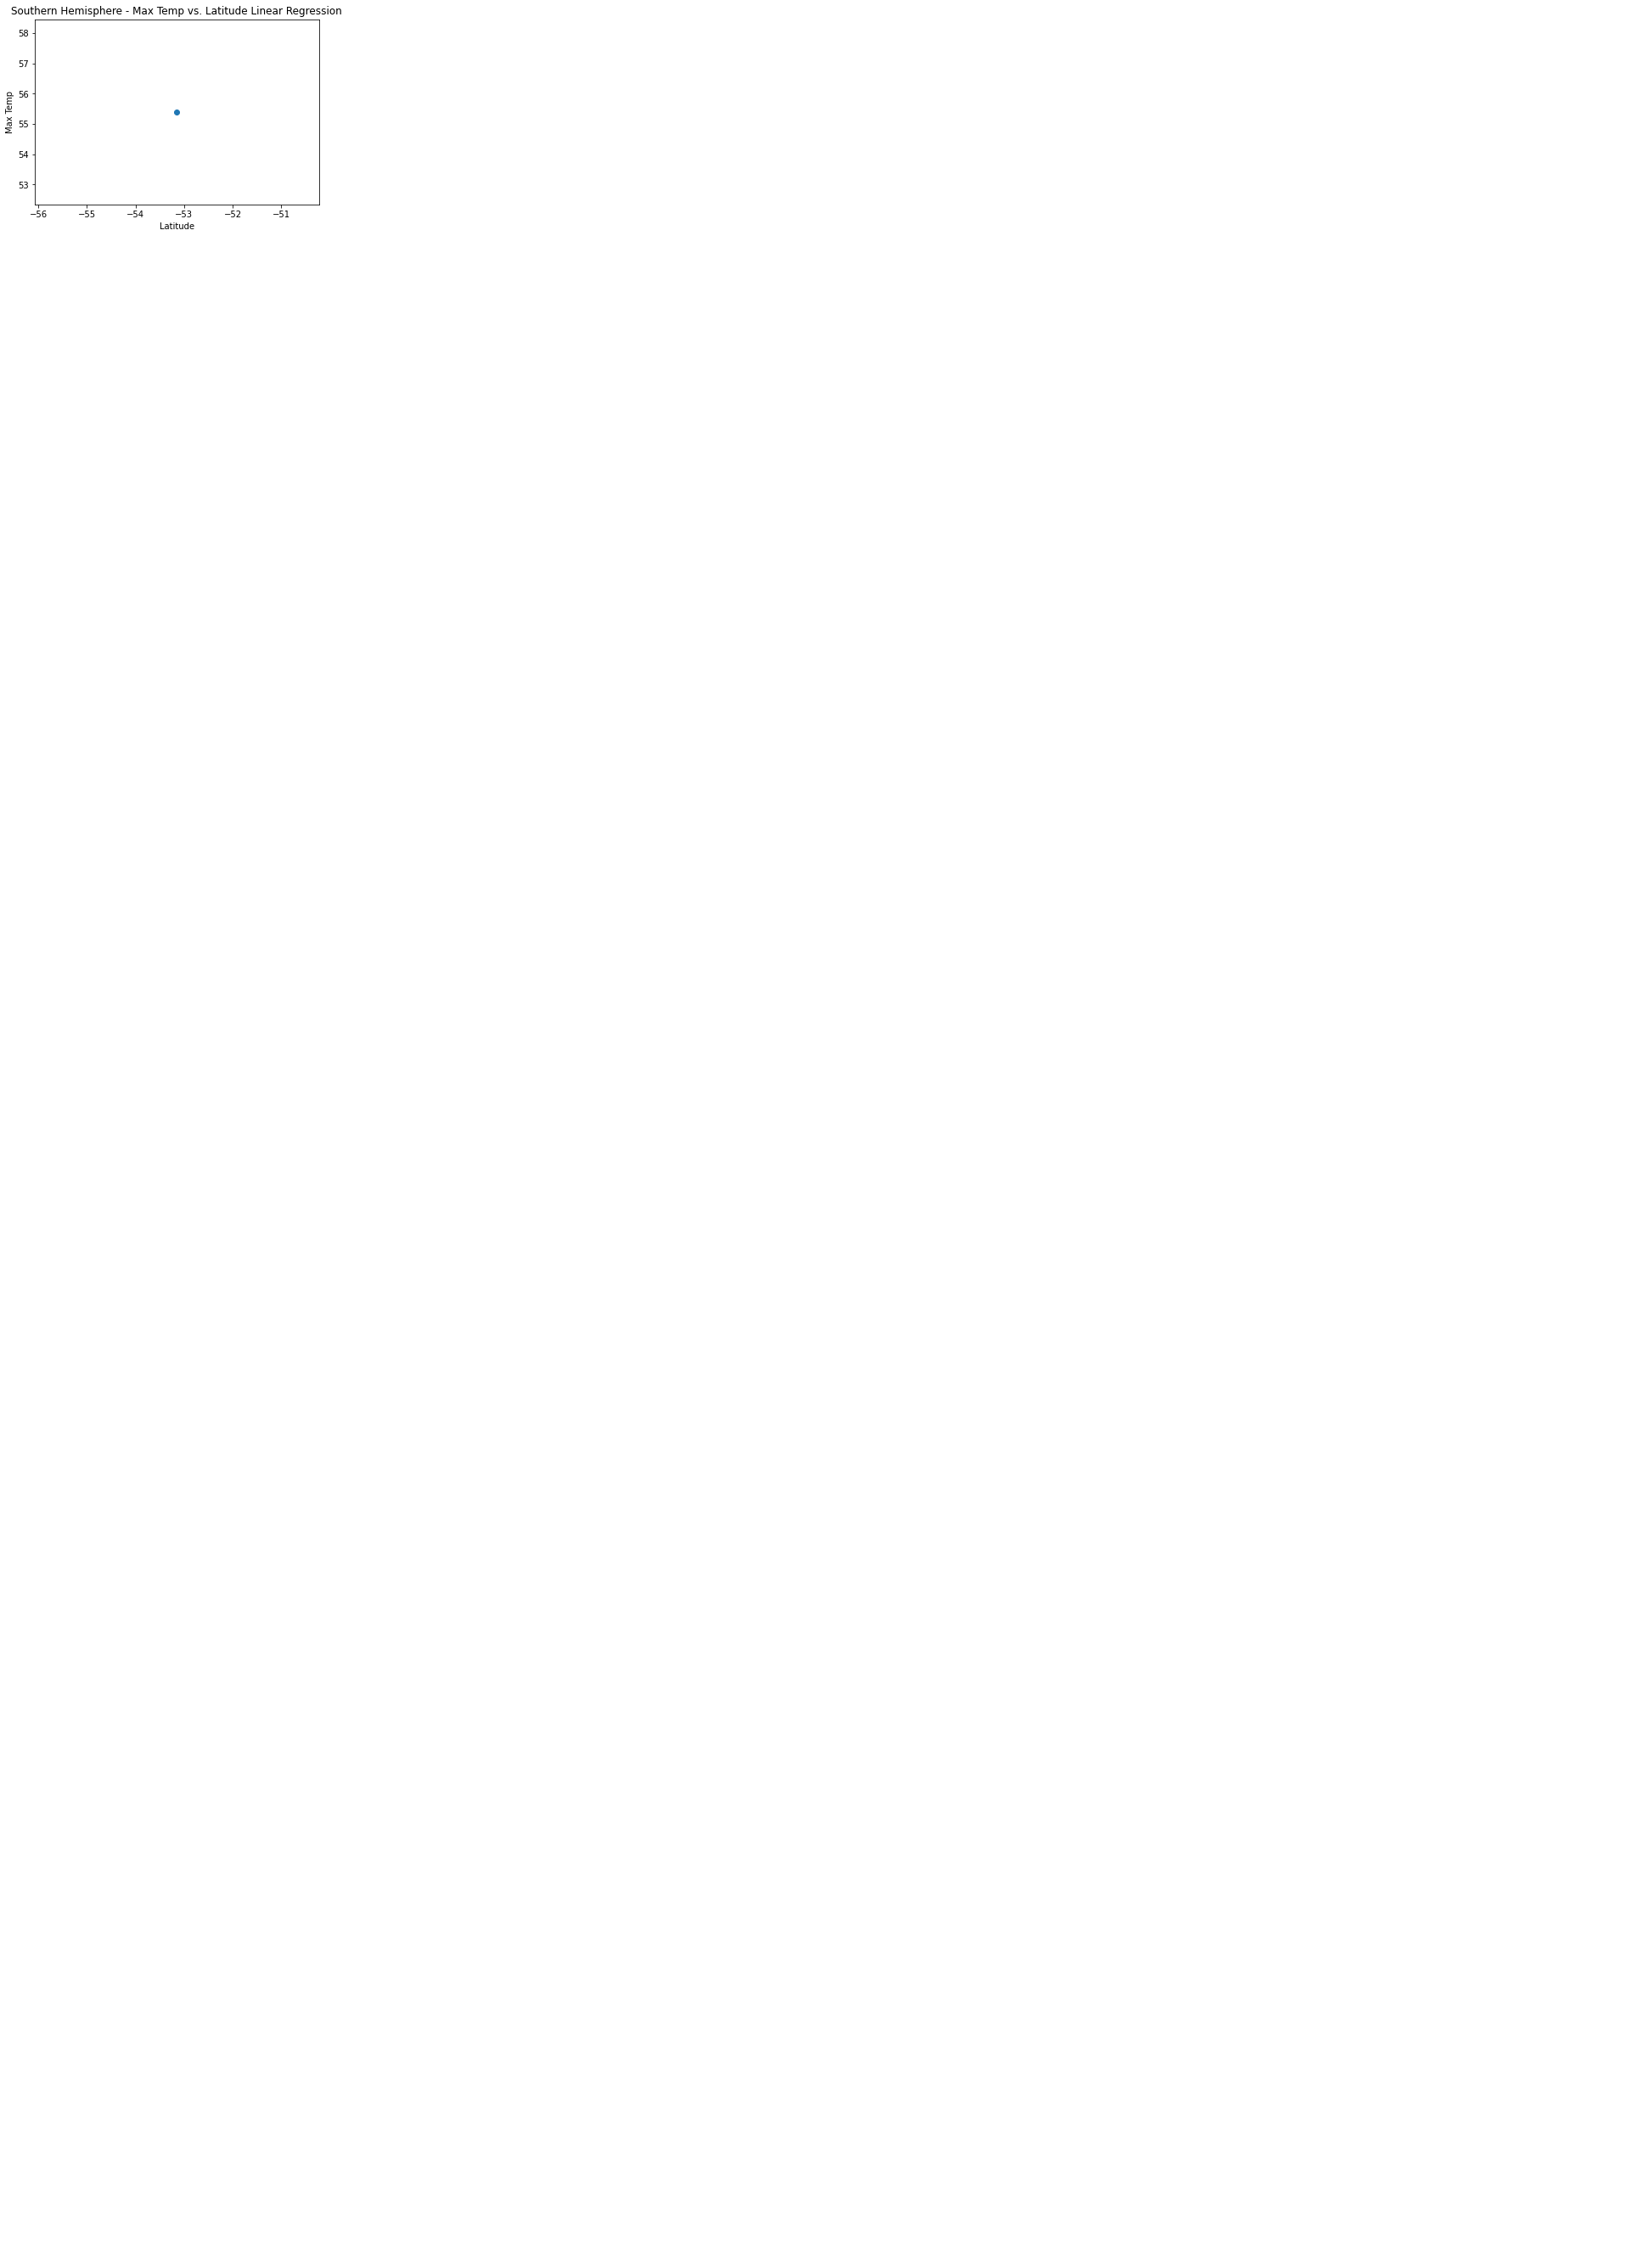

In [96]:
# Southern Hemisphere is where Longitude  ranges from 0 through -90  and Latitude ranges from -180 through +180
southernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= -90) & (api_city_weather_df["Lng"] <= 0), :]

x_values = southernhemisphere1["Lat"]
y_values = southernhemisphere1["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : -0.14990885079328753


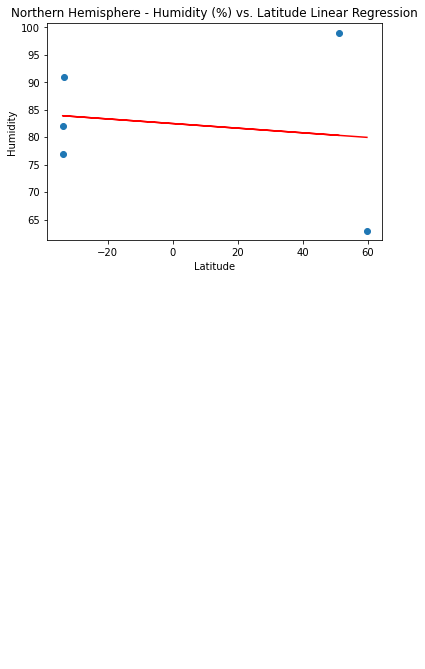

In [91]:
# Northern Hemisphere is where Longitude ranges from 0 through +90  and latitude ranges from -180 through +180
northernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= 0) & (api_city_weather_df["Lng"] <= 90), :]

x_values = northernhemisphere1["Lat"]
y_values = northernhemisphere1["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.0


C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0, 0.5, 'Humidity')

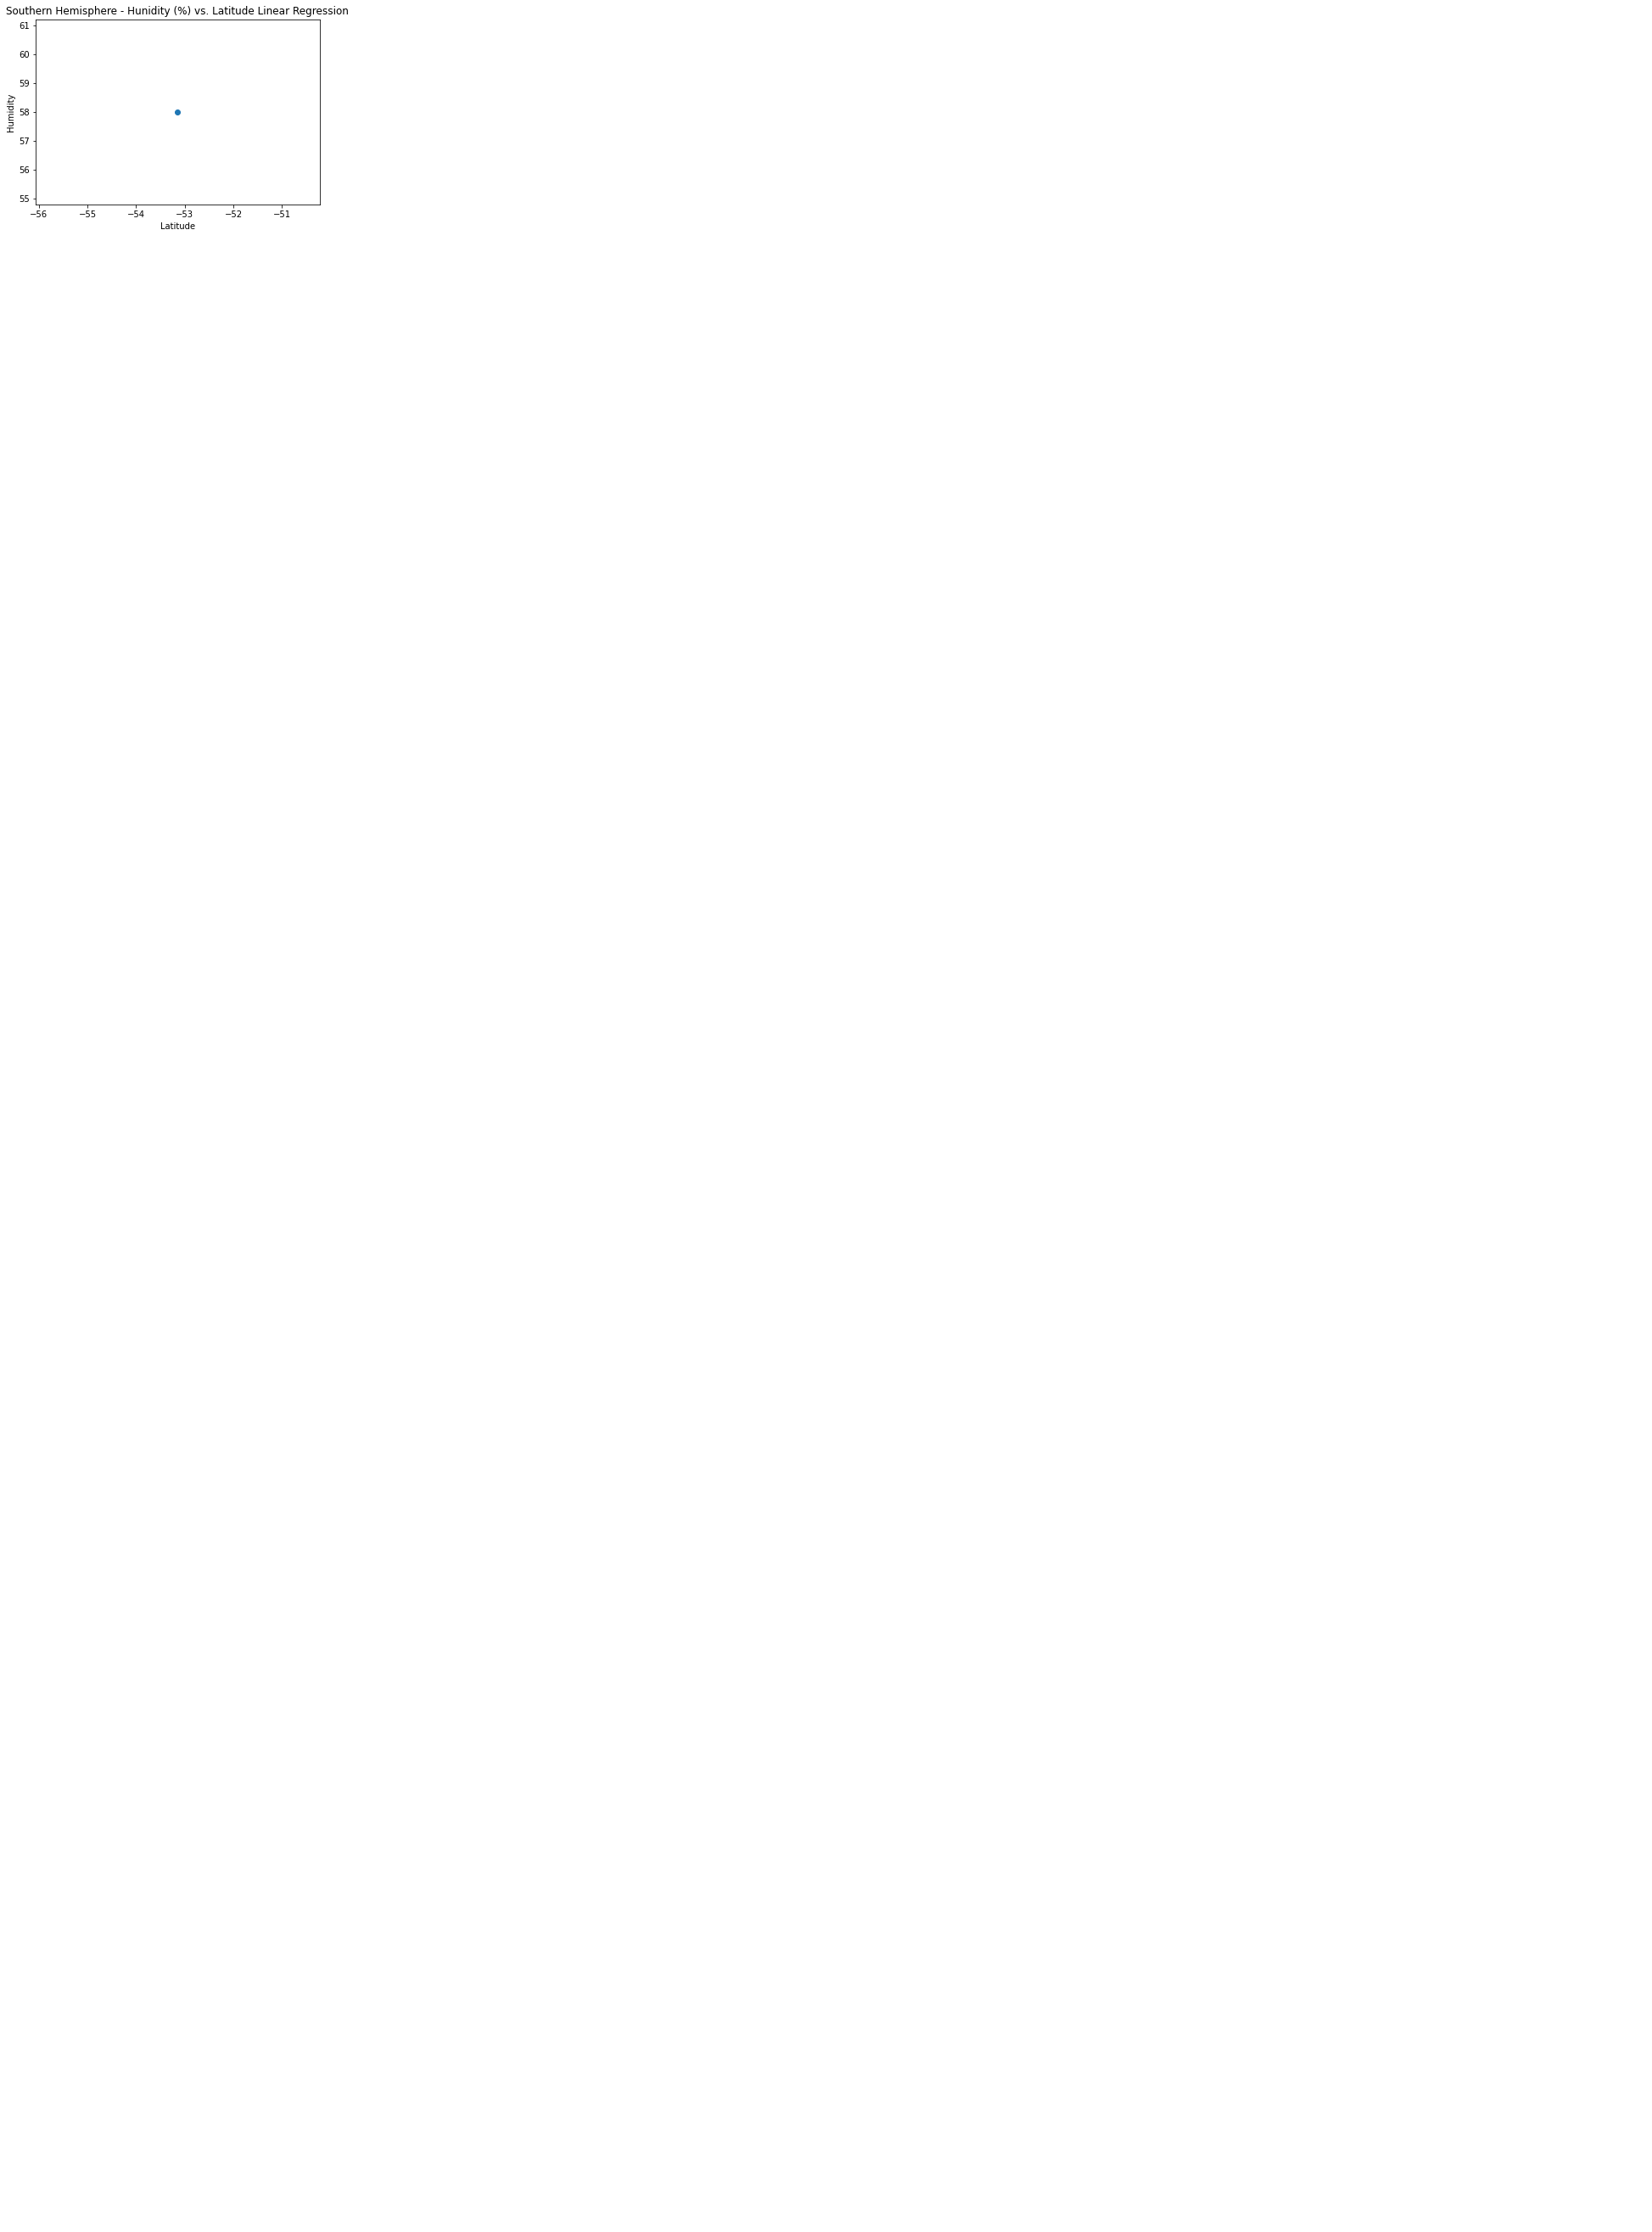

In [97]:
# Southern Hemisphere is where Longitude  ranges from 0 through -90  and Latitude ranges from -180 through +180
southernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= -90) & (api_city_weather_df["Lng"] <= 0), :]

x_values = southernhemisphere1["Lat"]
y_values = southernhemisphere1["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Southern Hemisphere - Hunidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : -0.2585011748491408


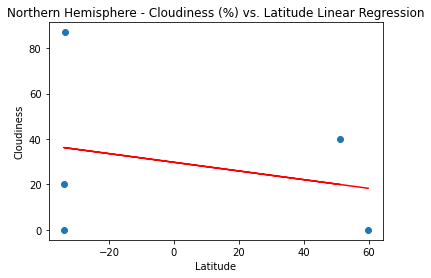

In [98]:
# Northern Hemisphere is where Longitude ranges from 0 through +90  and latitude ranges from -180 through +180
northernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= 0) & (api_city_weather_df["Lng"] <= 90), :]

x_values = northernhemisphere1["Lat"]
y_values = northernhemisphere1["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


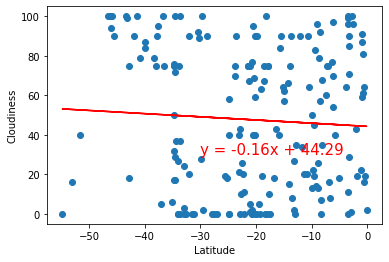

In [30]:
# Southern Hemisphere is where Longitude  ranges from 0 through -90  and Latitude ranges from -180 through +180
southernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] <= 0) & (api_city_weather_df["Lng"] >= -90), :]

x_values = southernhemisphere1["Lat"]
y_values = southernhemisphere1["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.021694746034599796


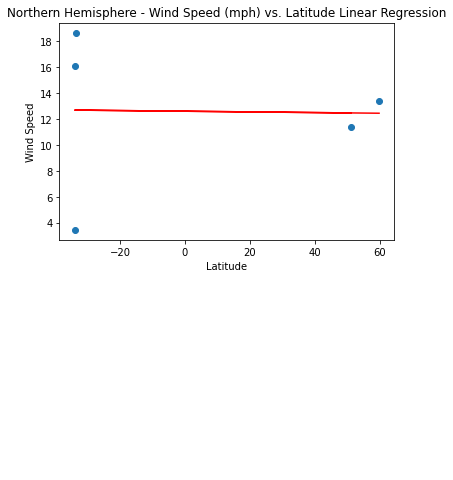

In [99]:
# Northern Hemisphere is where Longitude ranges from 0 through +90  and latitude ranges from -180 through +180
northernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= 0) & (api_city_weather_df["Lng"] <= 90), :]

x_values = northernhemisphere1["Lat"]
y_values = northernhemisphere1["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.0


C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\jasam\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0, 0.5, 'Wind Speed')

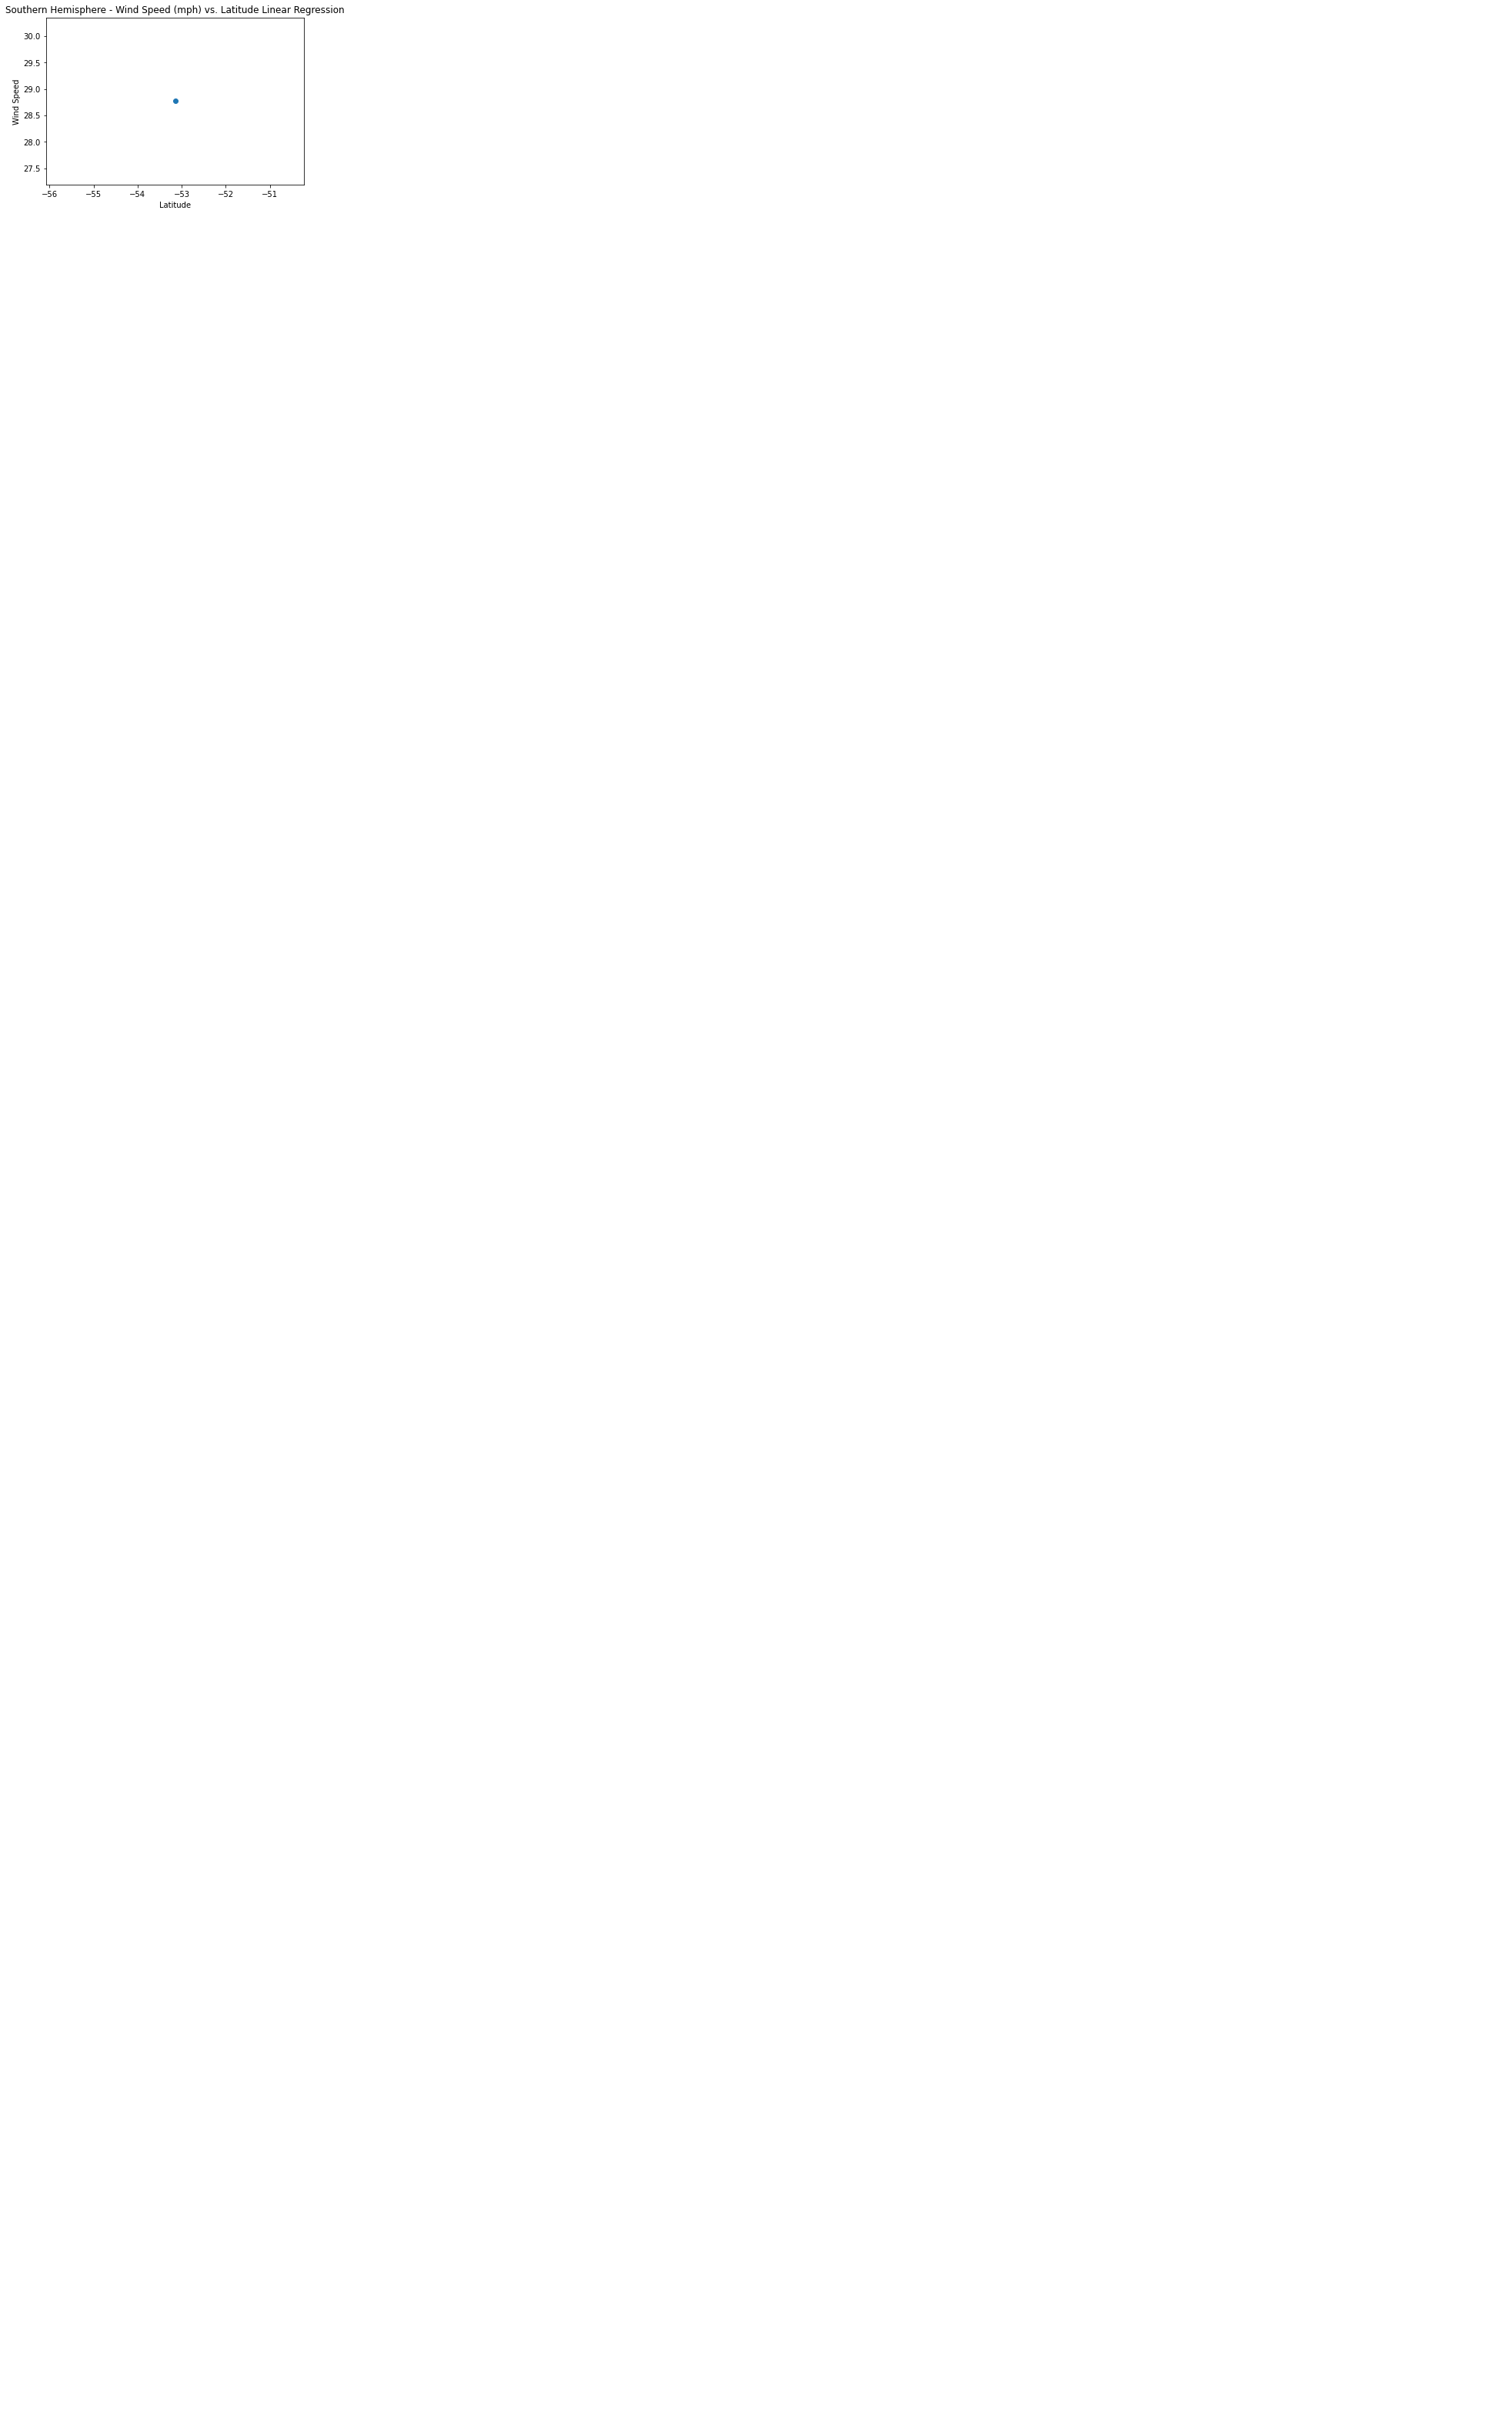

In [100]:
# Southern Hemisphere is where Longitude  ranges from 0 through -90  and Latitude ranges from -180 through +180
southernhemisphere1 = api_city_weather_df.loc[(api_city_weather_df["Lng"] <= 0) & (api_city_weather_df["Lng"] >= -90), :]

x_values = southernhemisphere1["Lat"]
y_values = southernhemisphere1["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')